# Simple text classification using ```scikit-learn```

## Import packages


In [2]:
# system tools
import os
import sys
sys.path.append("..")

# data munging tools
import pandas as pd
import utils.classifier_utils as clf

# Machine learning stuff
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn import metrics

# Visualisation
import matplotlib.pyplot as plt

## Reading in the data

Our data is already in a tabular format, so we're going to load it using ```pandas```

In [3]:
filename = os.path.join("..","data","fake_or_real_news.csv")

data = pd.read_csv(filename, index_col=0)

__Inspect data__

In [4]:
data.sample(10)
# like the head() function in R 

,title,text,label
7315,Russia Warns US Is Now A Colour Revolution “Ac...,\nA grim new Ministry of Defense ( MoD ) repor...,FAKE
5385,When Nobody Returns: Palestinians Show They ar...,Email \nI was in London last weekend to view a...,FAKE
10266,Standing Rock Protests: Police Turn In Badges ...,Share on Facebook It should be evident if you’...,FAKE
5308,Jon Stewart Finally Comments On Donald Trump’s...,Jon Stewart may no longer be the host of The D...,FAKE
7703,Globalist Soros Pours Money Into Manipulating ...,Email \nBillionaire globalist George Soros (sh...,FAKE
10274,The End Game Closes In On The Clintons As The ...,Leave a reply \nMike Adams – My fellow America...,FAKE
4827,Why Democrats are anxious,"(CNN) Donald Trump's reversal on the ""birther""...",REAL
5139,Ruth Bader Ginsburg regrets 'ill-advised' rema...,The supreme court justice Ruth Bader Ginsburg ...,REAL
3454,"Scalia, Thomas & Alito have totally lost it: T...","Regarding the dissenting justices: Um, what th...",REAL
5690,Fundamentals Will Take Gold & Silver Higher Now,"Financial Markets , Gold , Market Manipulation...",FAKE


In [5]:
data.shape
# 6335 examples with 3 columns per example 

(6335, 3)

<br>
Q: How many examples of each label do we have?

In [5]:
data["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

3171 - real and 3164 - fake, balanced data is very important. Otherwise classifer can just assume the larger group without actually being correct 

<br>

Let's now create new variables called ```X``` and ```y```, taking the data out of the dataframe so that we can mess around with them.

This is standard in the field. Input data referred to as X (captial) and output y (lowercase)

In [6]:
X = data["text"] # for whole column called data text rename it X
y = data["label"] # for column call data label, rename it y

## Train-test split

I've included most of the 'hard work' for you here already, because these are long cells which might be easy to mess up while live-coding.

Instead, we'll discuss what's happening. If you have questions, don't be shy!

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,           # texts for the model

                                                    y,          # classification labels
                                                    test_size=0.2,   # create an 80/20 split (20% test data, 80% train data) - no hard and fast rule here, can vary
                                                    random_state=42) # random state for reproducibility - like set.seed() in R

## Vectorizing and Feature Extraction

Vectorization. What is it and why are all the cool kids talking about it?

Essentially, vectorization is the process whereby textual or visual data is 'transformed' into some kind of numerical representation. One of the easiest ways to do this is to simple count how often individual features appear in a document.

Take the following text: 
<br><br>
<i>My father’s family name being Pirrip, and my Christian name Philip, my infant tongue could make of both names nothing longer or more explicit than Pip. So, I called myself Pip, and came to be called Pip.</i>
<br>

We can convert this into the following vector

| and | be | being | both | called | came | christian | could | explicit | family | father | i | infant | longer | make | more | my | myself | name | names | nothing | of | or | philip | pip | pirrip | s | so | than | to | tongue|
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |  --- |
| 2 | 1 | 1 | 1 | 2 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 3 | 1 | 2 | 1 | 1 | 1 | 1 | 1 | 3 | 1 | 1 | 1 | 1 | 1 | 1 |

<br>
Our textual data is hence reduced to a jumbled-up 'vector' of numbers, known somewhat quaintly as a <i>bag-of-words</i>.
<br>
<br>
To do this in practice, we first need to create a vectorizer. 

Tfidf vectors tend to be better for training classifiers. Why might that be?

__Create vectorizer object__

CountVectorize - part of Sci Kit learn, just need to define a range of parameters

In [9]:
vectorizer = CountVectorizer(ngram_range = (1,2),     # unigrams and bigrams (1 word and 2 word units) 2 word unit like New York
                             lowercase =  True,       # why use lowercase?
                             max_df = 0.95,           # remove very common words, removes words in more than 95% of documents
                             min_df = 0.05,           # remove very rare words, in less than 5% of documents
                             max_features = 100)      # keep only top 100 features

Can adjust the max/min  cut offs. Can also remove them and compare results for with them and see how it affects the results and if it's important. Can be task specific, the rare one will remove spelling errors for example but we may want to see that depending on what we're looking at. 

This vectorizer is then used to turn all of our documents into a vector of numbers, instead of text.

In [11]:
# first we fit to the training data...now a vector of length 100
X_train_feats = vectorizer.fit_transform(X_train)

#... then do it for our test data not using fit.transform, just .transform - ** vectorizer should be the same on both test and train data
X_test_feats = vectorizer.transform(X_test)

# get feature names
feature_names = vectorizer.get_feature_names_out()

In [10]:
feature_names

array(['about', 'after', 'all', 'also', 'an', 'and', 'and the', 'are',
       'as', 'at', 'at the', 'be', 'because', 'been', 'but', 'by',
       'campaign', 'can', 'clinton', 'could', 'do', 'even', 'first',
       'for', 'for the', 'from', 'had', 'has', 'have', 'he', 'her',
       'hillary', 'him', 'his', 'how', 'if', 'in', 'in the', 'into', 'is',
       'it', 'its', 'just', 'like', 'many', 'more', 'most', 'new', 'no',
       'not', 'now', 'obama', 'of', 'of the', 'on', 'on the', 'one',
       'only', 'or', 'other', 'our', 'out', 'over', 'party', 'people',
       'president', 'republican', 'said', 'she', 'so', 'some', 'state',
       'states', 'than', 'that', 'that the', 'their', 'them', 'there',
       'they', 'this', 'time', 'to be', 'to the', 'trump', 'two', 'up',
       'us', 'was', 'we', 'were', 'what', 'when', 'which', 'who', 'will',
       'with', 'with the', 'would', 'you'], dtype=object)

## Classifying and predicting

We now have to 'fit' the classifier to our data. This means that the classifier takes our data and finds correlations between features and labels.

These correlations are then the *model* that the classifier learns about our data. This model can then be used to predict the label for new, unseen data.

In [11]:
# trained on the training data 
classifier = LogisticRegression(random_state=42).fit(X_train_feats, y_train)

Q: How do we use the classifier to make predictions?

In [12]:
# using test data to see predictions, based on training data 
y_pred = classifier.predict(X_test_feats)

Q: What are the predictions for the first 20 examples of the test data?

In [13]:
print(y_pred[:20])

['FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'REAL' 'FAKE'
 'FAKE' 'REAL' 'REAL' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'REAL' 'REAL']


We can also inspect the model, in order to see which features are most informative when trying to predict a label. 

To do this, we can use the ```show_features``` function that I defined earlier - how convenient!

Q: What are the most informative features? Use ```show_features```to find out!

In [14]:
clf.show_features(vectorizer, y_train, classifier, n=20)
# showing the weight of that term 

FAKE				REAL

-0.2027	just           		0.3138	but            
-0.1674	by             		0.2158	said           
-0.1255	that the       		0.1835	state          
-0.1192	us             		0.1717	than           
-0.1078	be             		0.1492	who            
-0.0968	this           		0.1446	most           
-0.0906	with           		0.1258	obama          
-0.0878	had            		0.1145	other          
-0.0820	you            		0.1073	more           
-0.0690	so             		0.1019	up             
-0.0670	to the         		0.0988	on the         
-0.0668	all            		0.0953	also           
-0.0626	is             		0.0834	president      
-0.0616	of the         		0.0723	one            
-0.0614	into           		0.0693	she            
-0.0612	there          		0.0693	two            
-0.0560	was            		0.0652	that           
-0.0550	like           		0.0647	out            
-0.0548	now            		0.0544	to be          


## Evaluate

We can also do some quick calculations, in order to assess just how well our model performs.

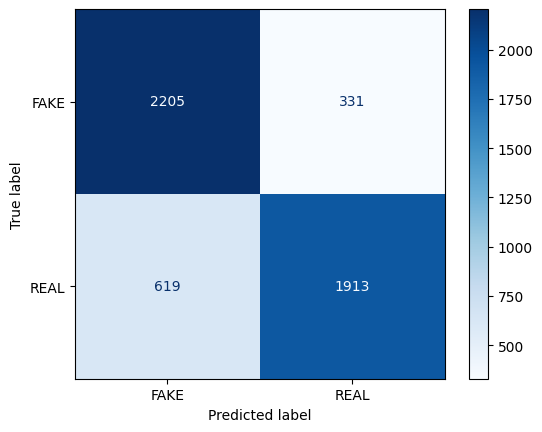

In [15]:
metrics.ConfusionMatrixDisplay.from_estimator(classifier,           # the classifier name
                                            X_train_feats,          # the training features
                                            y_train,                # the training labels
                                            cmap=plt.cm.Blues,      # make the colours prettier
                                            labels=["FAKE", "REAL"])# the labels in your data arranged alphabetically

See very end of this notebook for term defintions 

This confusion matrix can be broken down a little bit more and used to draw more meaningful statistical results:

<img src="../img/confusionMatrix.jpg" alt="Alternative text" />

__Calculating metrics__

```scikit-learn``` has a built-in set of tools which can be used to calculate these metrics, to get a better idea of how our model is performing.

In [16]:
classifier_metrics = metrics.classification_report(y_test, y_pred)
print(classifier_metrics)

              precision    recall  f1-score   support

        FAKE       0.79      0.86      0.83       628
        REAL       0.85      0.78      0.81       639

    accuracy                           0.82      1267
   macro avg       0.82      0.82      0.82      1267
weighted avg       0.82      0.82      0.82      1267



## Cross validation and further evaluation

One thing we can't be sure of is that our model performance is simply related to how the train-test split is made.

To try to mitigate this, we can perform cross-validation, in order to test a number of different train-test splits and finding the average scores.

Let's do this on the full dataset:

In [17]:
X_vect = vectorizer.fit_transform(X)

The first plot is probably the most interesting. Some terminology:

- If two curves are "close to each other" and both of them but have a low score, the model suffers from an underfitting problem (High Bias)

- If there are large gaps between two curves, then the model suffer from an overfitting problem (High Variance)


/home/coder/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/coder/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

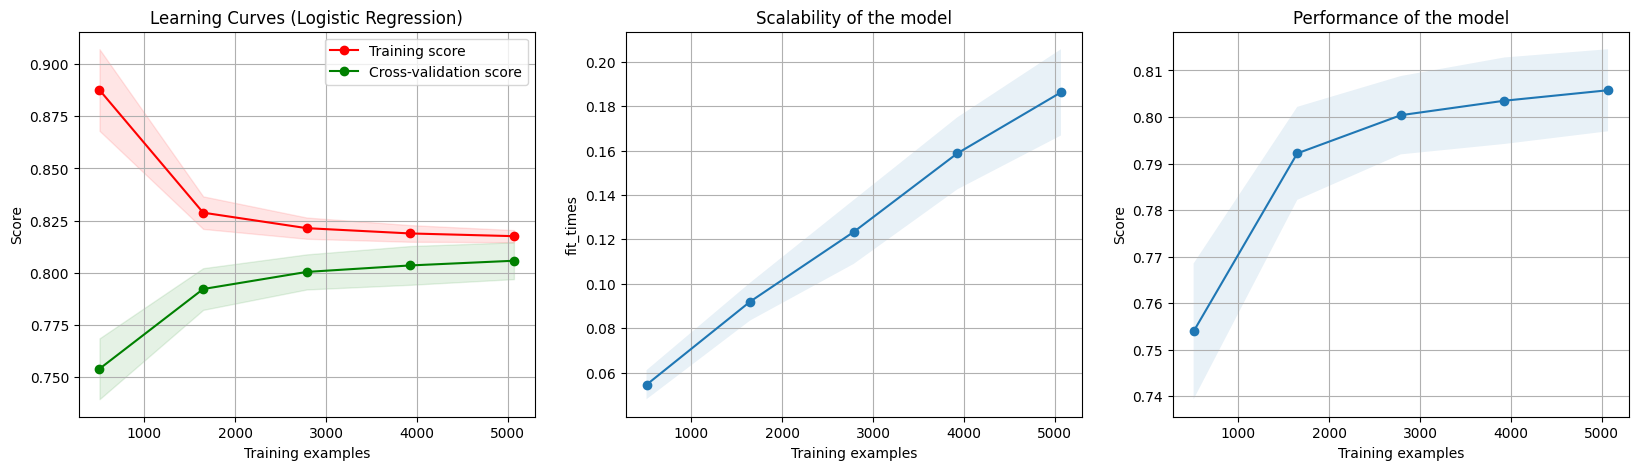

In [18]:
title = "Learning Curves (Logistic Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0) # shuffling and splitting 100 times with that 80/20 test split 

estimator = LogisticRegression(random_state=42)
clf.plot_learning_curve(estimator, title, X_vect, y, cv=cv, n_jobs=4)

- No over or underfitting, can see that scores get closer to each other, has a resonably high accuracy score

- The second plot shows how model performance scales when more data is added;
- The third plot shows how much of a performance improvement we get from adding more data

## Save models

It is also somewhat trivial to save models and reload them for later use. For that, we can use the library ```joblib```.

In [20]:
from joblib import dump, load
dump(classifier, "LR_classifier.joblib")
dump(vectorizer, "bow_vectorizer.joblib") # bow - bag of words 

['bow_vectorizer.joblib']

We can restart the kernel for our notebook to see how that works:

In [ ]:
from joblib import dump, load
loaded_clf = load("LR_classifier.joblib")
loaded_vect = load("bow_vectorizer.joblib")

In [ ]:
sentence = "Hilary Clinton is a crook who eats babies!"

In [ ]:
test_sentence = loaded_vect.transform([sentence])
loaded_clf.predict(test_sentence)

## Appendix - Interpreting a confusion matrix

Imagine that we are testing a classifier to see how well it can predict if someone has COVID:


```Accuracy => (TP+TN)/(TP+FP+FN+TN)```
- Ratio of correct classifications across all of the patients

```True Positive Rate => Recall  => Sensitivity => (TP / TP + FN)```
- The proportion of the positive class who were correctly classified
    - I.e sick people correctly identified as being sick

```Precision =>  (TP / TP + FP)```
- The ration of true positives to everyone predicted as positive
    - I.e. the proportion we identify as having COVID who actually do have it

```True negative rate => Specificity => (TN / TN + FP)```
- The proportion of the negative class who were correctly classified
    - I.e. healthy people who were correctly identified as being healthy

The following can also be calculated but are not featured on the confusion matrix above:

```False negative rate => (FN / TP + FN)```
- Proportion of the positive class who were incorrectly classified by the classifier
  - I.e. people predicted as healthy who are actually sick

```False positive rate = (FP / TN + FP) = 1 - Specificity```
- Proportion of the negative class who were incorrectly classified by the classifier
  - I.e. people predicted as sick who are actually healthy

```F1 => 2(P*R / P + R)```
- Harmonic mean of precision and recall, useful where both precision and recall are important